# Python Bootcamp Project 24-25: Customer Segmentation

In [1]:
from itertools import product

import StandardScaler
# allows for multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
from matplotlib.lines import lineStyles
from scipy.stats import alpha
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Import

In [3]:
df = pd.read_excel('Online Retail.xlsx')
print('******************************************** COLUMNS OF DATASET *****************************************************')
df.columns
print('******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************')
df.head()
print('******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************')
df.tail()
print('******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************')
df.info()
print('************************************************ DESCRIPTION OF DATA  **********************************************')
df.describe()


******************************************** COLUMNS OF DATASET *****************************************************


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
************************************************ DESCRIPTION OF DATA  **********************************************


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
num_rows = len(df)
num_cols = len(df.columns)
print(f'Number of rows are {num_rows}, and number of columns are {num_cols}.')
column_names = df.columns.tolist()
column_names

Number of rows are 541909, and number of columns are 8.


['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

## Data Cleaning

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [7]:
df.duplicated().sum()

np.int64(5268)

In [8]:
df.drop_duplicates(keep=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
# Remove rows with negative or zero Quantity or UnitPrice
df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
# check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# remove rows where 'Description' is null
df = df[df['Description'].notnull()]

In [12]:
# fill missing values in 'CustomerID' with 0 (as an example)
df['CustomerID'] = df['CustomerID'].fillna(0)

In [13]:
# check the updated data information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Revenue Contribution Analysis: 
### Identifying to 20 products contributing the most to overall revenue.

In [14]:
#calculating revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [15]:
# Group by StockCode and Description to calculate total revenue
revenue_per_product = df.groupby(['StockCode','Description'])['Revenue'].sum().reset_index()
# Sort by revenue in descending order
revenue_per_product = revenue_per_product.sort_values(by='Revenue', ascending=False)
# Display the top contributors
revenue_per_product

,StockCode,Description,Revenue
4780,DOT,DOTCOM POSTAGE,206245.480
1464,22423,REGENCY CAKESTAND 3 TIER,164762.190
3045,47566,PARTY BUNTING,98302.980
4373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97715.990
4360,85099B,JUMBO BAG RED RETROSPOT,92356.030
...,...,...,...
4764,BANK CHARGES,Bank Charges,-7175.639
4766,CRUK,CRUK Commission,-7933.430
4763,B,Adjust bad debt,-11062.060
4781,M,Manual,-68674.190


### Total revenue contribution 

In [16]:
#total revenue
total_revenue_contributor = revenue_per_product.sort_values(by = 'Revenue', ascending=False)

# Calculate Cumulative Revenue and Cumulative Percentage
total_revenue_contributor['Cumulative Revenue'] = total_revenue_contributor['Revenue'].cumsum()
total_revenue = total_revenue_contributor['Revenue'].sum()
total_revenue_contributor['Cumulative %'] = (total_revenue_contributor['Cumulative Revenue'] / total_revenue) * 100



<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='None', ylabel='Revenue'>

Text(0.5, 1.0, 'Revenue Distribution')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Revenue')

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

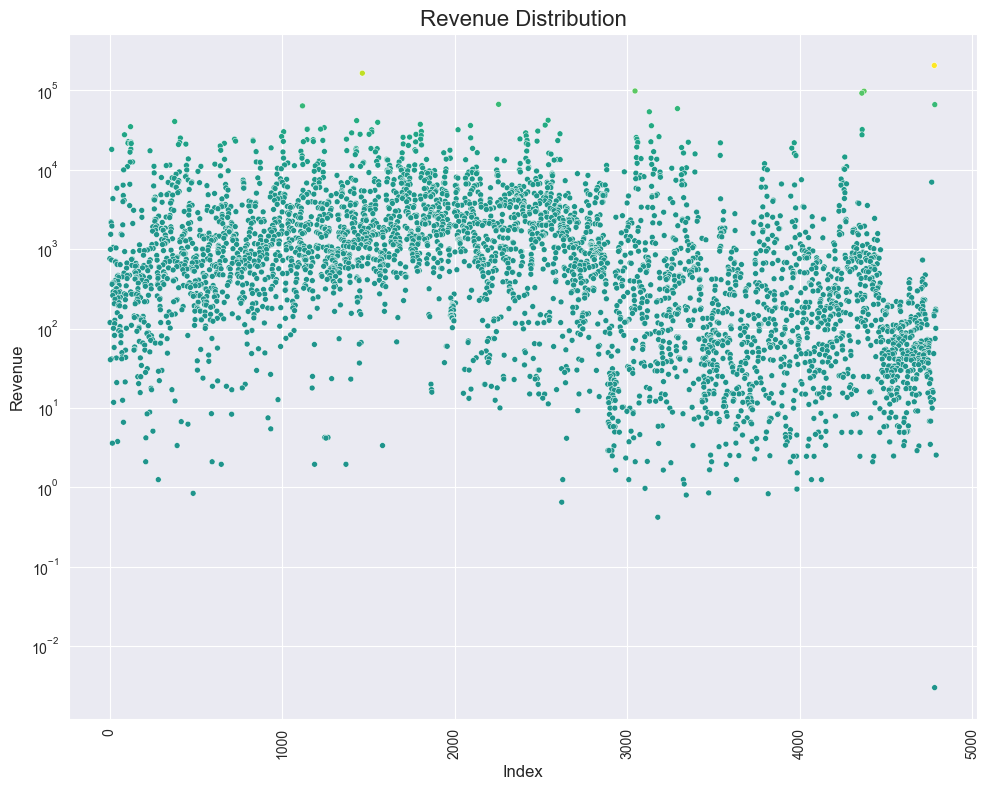

In [17]:
# scatterplot of total revenue
plt.figure(figsize=(10,8))
# Create scatter plot with customized parameters
sns.scatterplot(x=total_revenue_contributor.index, y=total_revenue_contributor['Revenue'], hue=total_revenue_contributor['Revenue'], palette='viridis', size=30, legend=None)

# Set title and labels
plt.title('Revenue Distribution', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.yscale('log') # Use log scale for Y-axis to make large revenue values more defined
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Pareto Chart to Highlight Top 20 Contributors

In [18]:
# Sort by revenue in descending order and select the top 20 products

top_20_contributors = revenue_per_product.sort_values(by='Revenue', ascending=False).head(20)

# Calculate Cumulative Revenue and Cumulative Percentage
top_20_contributors['Cumulative Revenue'] = top_20_contributors['Revenue'].cumsum()
total_revenue = top_20_contributors['Revenue'].sum()
print(f"Total Revenue: {total_revenue}")


top_20_contributors['Cumulative %'] = (top_20_contributors['Cumulative Revenue'] / total_revenue) * 100
print(top_20_contributors[['Description', 'Revenue', 'Cumulative %']])


top_20_contributors

Total Revenue: 1347612.03
                             Description    Revenue  Cumulative %
4780                      DOTCOM POSTAGE  206245.48     15.304515
1464            REGENCY CAKESTAND 3 TIER  164762.19     27.530748
3045                       PARTY BUNTING   98302.98     34.825353
4373  WHITE HANGING HEART T-LIGHT HOLDER   97715.99     42.076401
4360             JUMBO BAG RED RETROSPOT   92356.03     48.929711
2254                  RABBIT NIGHT LIGHT   66756.59     53.883406
4783                             POSTAGE   66230.64     58.798073
1117     PAPER CHAIN KIT 50'S CHRISTMAS    63791.94     63.531775
3291       ASSORTED COLOUR BIRD ORNAMENT   58959.73     67.906901
3128                       CHILLI LIGHTS   53768.06     71.896778
2541                      SPOTTY BUNTING   42065.32     75.018249
1431             JUMBO BAG PINK POLKADOT   41619.66     78.106650
376             BLACK RECORD COVER FRAME   40596.96     81.119161
1553      PICNIC BASKET WICKER 60 PIECES   39619.5

,StockCode,Description,Revenue,Cumulative Revenue,Cumulative %
4780,DOT,DOTCOM POSTAGE,206245.48,206245.48,15.304515
1464,22423,REGENCY CAKESTAND 3 TIER,164762.19,371007.67,27.530748
3045,47566,PARTY BUNTING,98302.98,469310.65,34.825353
4373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97715.99,567026.64,42.076401
4360,85099B,JUMBO BAG RED RETROSPOT,92356.03,659382.67,48.929711
2254,23084,RABBIT NIGHT LIGHT,66756.59,726139.26,53.883406
4783,POST,POSTAGE,66230.64,792369.90,58.798073
1117,22086,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94,856161.84,63.531775
3291,84879,ASSORTED COLOUR BIRD ORNAMENT,58959.73,915121.57,67.906901
3128,79321,CHILLI LIGHTS,53768.06,968889.63,71.896778


In [19]:
most_sold_product = revenue_per_product.sort_values(by='Revenue', ascending=False).head(1)
print(most_sold_product)


     StockCode     Description    Revenue
4780       DOT  DOTCOM POSTAGE  206245.48


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Description', ylabel='Revenue'>

Text(0, 207245.48, '206,245')

Text(1, 165762.19, '164,762')

Text(2, 99302.98, '98,303')

Text(3, 98715.99, '97,716')

Text(4, 93356.03, '92,356')

Text(5, 67756.59, '66,757')

Text(6, 67230.64, '66,231')

Text(7, 64791.94, '63,792')

Text(8, 59959.729999999996, '58,960')

Text(9, 54768.060000000005, '53,768')

Text(10, 43065.32, '42,065')

Text(11, 42619.66, '41,620')

Text(12, 41596.96, '40,597')

Text(13, 40619.5, '39,620')

Text(14, 38413.44, '37,413')

Text(15, 37565.39, '36,565')

Text(16, 37116.09, '36,116')

Text(17, 36859.27, '35,859')

Text(18, 35897.31, '34,897')

Text(19, 34969.46, '33,969')

Text(0.5, 1.0, 'Pareto Chart of Revenue Contribution of Top 20 Contributors')

Text(0.5, 0, 'Product Description')

Text(0, 0.5, 'Revenue')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'DOTCOM POSTAGE'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'PARTY BUNTING'),
  Text(3, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(4, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(5, 0, 'RABBIT NIGHT LIGHT'),
  Text(6, 0, 'POSTAGE'),
  Text(7, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(8, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(9, 0, 'CHILLI LIGHTS'),
  Text(10, 0, 'SPOTTY BUNTING'),
  Text(11, 0, 'JUMBO BAG PINK POLKADOT'),
  Text(12, 0, 'BLACK RECORD COVER FRAME'),
  Text(13, 0, 'PICNIC BASKET WICKER 60 PIECES'),
  Text(14, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(15, 0, 'DOORMAT KEEP CALM AND COME IN'),
  Text(16, 0, 'JAM MAKING SET WITH JARS'),
  Text(17, 0, 'WOOD BLACK BOARD ANT WHITE FINISH'),
  Text(18, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(19, 0, 'POPCORN HOLDER')])

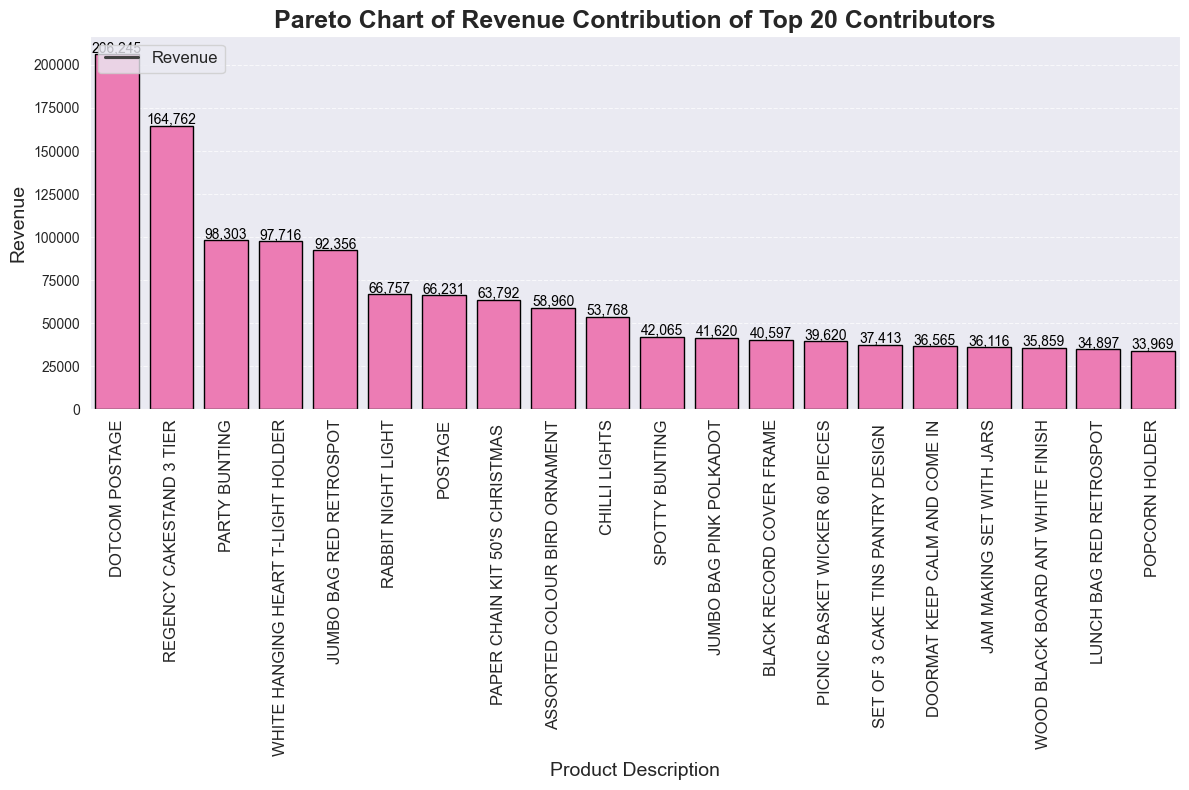

In [20]:
# Enhance the Pareto chart
plt.figure(figsize=(12, 8))

# Create a bar plot with a gradient color (based on revenue)

sns.barplot(x=top_20_contributors['Description'], y=top_20_contributors['Revenue'], color='hotpink', edgecolor = 'black',label='Revenue')
            
# Add annotations for each bar with revenue value
for i in range(len(top_20_contributors)):
    plt.text(i, top_20_contributors['Revenue'].iloc[i] + 1000, 
             f"{top_20_contributors['Revenue'].iloc[i]:,.0f}", 
             ha='center', fontsize=10, color='black')

# Set titles and labels with improved styling
plt.title('Pareto Chart of Revenue Contribution of Top 20 Contributors', fontsize=18, fontweight='bold')
plt.xlabel('Product Description', fontsize=14)
plt.ylabel('Revenue', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Add gridlines for better visibility of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend for clarity (though in this case, it's optional)
plt.legend(['Revenue'], loc='upper left', fontsize=12)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x1000 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1448e2d9010>,
 [Text(-0.5549922638679389, 1.0639471730526568, 'DOTCOM POSTAGE'),
  Text(-1.0722522017227916, 0.24551011364224082, 'REGENCY CAKESTAND 3 TIER'),
  Text(-1.0181600688053503, -0.4163533046467684, 'PARTY BUNTING'),
  Text(-0.7299862174704593, -0.8228730900346489, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(-0.30668733131440007, -1.0563819767542664, 'JUMBO BAG RED RETROSPOT'),
  Text(0.09708821213317169, -1.0957070224584602, 'RABBIT NIGHT LIGHT'),
  Text(0.4267393680624855, -1.0138508330842515, 'POSTAGE'),
  Text(0.7099118252643863, -0.8402530573284381, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(0.9182232289296987, -0.605694726618879, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(1.0440458825370198, -0.3463642521356605, 'CHILLI LIGHTS'),
  Text(1.0948379471558438, -0.106441859564636, 'SPOTTY BUNTING'),
  Text(1.0947035103503266, 0.1078156965690643, 'JUMBO BAG PINK POLKADOT'),
  Text(1.0541192021258827, 0.3143766971476936, 'BLACK RECORD COVER FRAM

Text(0.5, 1.0, 'Revenue Contribution of Top 20 Products')

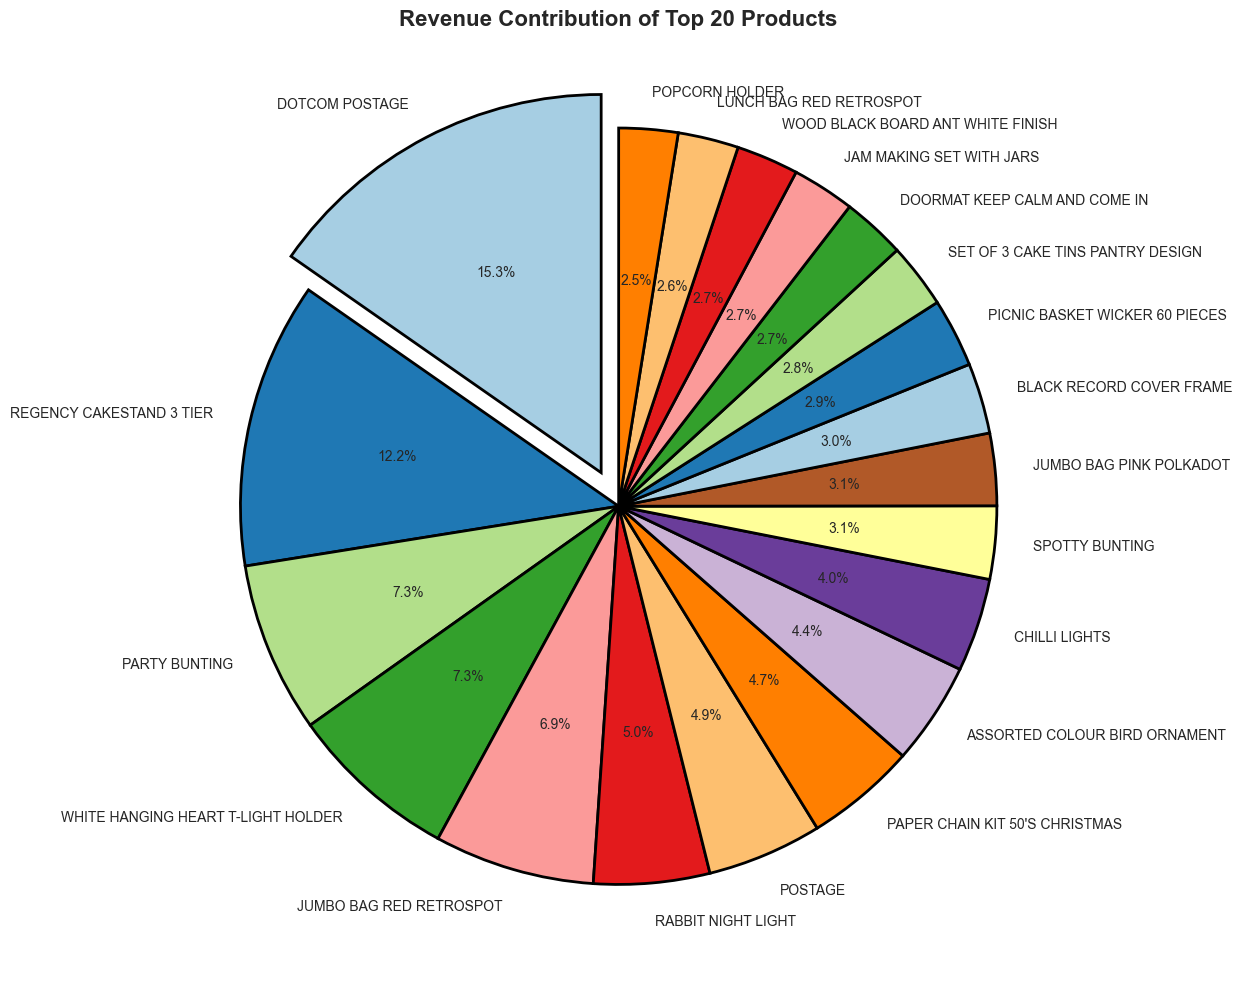

In [21]:
import matplotlib.pyplot as plt

# Create the pie chart
plt.figure(figsize=(12, 10))

# Exploding the largest slice (top contributor) for emphasis
explode = [0.1 if revenue == top_20_contributors['Revenue'].max() else 0 for revenue in top_20_contributors['Revenue']]

# Plot pie chart with revenue as slices
plt.pie(top_20_contributors['Revenue'], 
        labels=top_20_contributors['Description'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors,  # Use a more appealing color palette
        explode=explode,  # Highlight the largest slice
        wedgeprops={'edgecolor': 'black', 'linewidth': 2})  # Add edge to slices for clarity

#title and label
plt.title('Revenue Contribution of Top 20 Products', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


<Axes: xlabel='Description', ylabel='Revenue'>

Text(0, 10, '15.3%')

Text(0, 10, '27.5%')

Text(0, 10, '34.8%')

Text(0, 10, '42.1%')

Text(0, 10, '48.9%')

Text(0, 10, '53.9%')

Text(0, 10, '58.8%')

Text(0, 10, '63.5%')

Text(0, 10, '67.9%')

Text(0, 10, '71.9%')

Text(0, 10, '75.0%')

Text(0, 10, '78.1%')

Text(0, 10, '81.1%')

Text(0, 10, '84.1%')

Text(0, 10, '86.8%')

Text(0, 10, '89.5%')

Text(0, 10, '92.2%')

Text(0, 10, '94.9%')

Text(0, 10, '97.5%')

Text(0, 10, '100.0%')

Text(0, 211245.48, '206,245')

Text(1, 169762.19, '164,762')

Text(2, 103302.98, '98,303')

Text(3, 102715.99, '97,716')

Text(4, 97356.03, '92,356')

Text(5, 71756.59, '66,757')

Text(6, 71230.64, '66,231')

Text(7, 68791.94, '63,792')

Text(8, 63959.729999999996, '58,960')

Text(9, 58768.060000000005, '53,768')

Text(10, 47065.32, '42,065')

Text(11, 46619.66, '41,620')

Text(12, 45596.96, '40,597')

Text(13, 44619.5, '39,620')

Text(14, 42413.44, '37,413')

Text(15, 41565.39, '36,565')

Text(16, 41116.09, '36,116')

Text(17, 40859.27, '35,859')

Text(18, 39897.31, '34,897')

Text(19, 38969.46, '33,969')

Text(0.5, 1.0, 'Pareto Chart of Revenue Contribution of Top 20 Contributors')

Text(0.5, 0, 'Product Description')

Text(0, 0.5, 'Revenue')

Text(0, 0.5, 'Cumulative %')

C:\Users\SURANJANA\AppData\Local\Temp\ipykernel_32916\502653285.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_20_contributors['Description'], rotation=90, fontsize=12)


[Text(0, 0, 'DOTCOM POSTAGE'),
 Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
 Text(2, 0, 'PARTY BUNTING'),
 Text(3, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
 Text(4, 0, 'JUMBO BAG RED RETROSPOT'),
 Text(5, 0, 'RABBIT NIGHT LIGHT'),
 Text(6, 0, 'POSTAGE'),
 Text(7, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
 Text(8, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
 Text(9, 0, 'CHILLI LIGHTS'),
 Text(10, 0, 'SPOTTY BUNTING'),
 Text(11, 0, 'JUMBO BAG PINK POLKADOT'),
 Text(12, 0, 'BLACK RECORD COVER FRAME'),
 Text(13, 0, 'PICNIC BASKET WICKER 60 PIECES'),
 Text(14, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
 Text(15, 0, 'DOORMAT KEEP CALM AND COME IN'),
 Text(16, 0, 'JAM MAKING SET WITH JARS'),
 Text(17, 0, 'WOOD BLACK BOARD ANT WHITE FINISH'),
 Text(18, 0, 'LUNCH BAG RED RETROSPOT'),
 Text(19, 0, 'POPCORN HOLDER')]

C:\Users\SURANJANA\AppData\Local\Temp\ipykernel_32916\502653285.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='center right', fontsize=12)


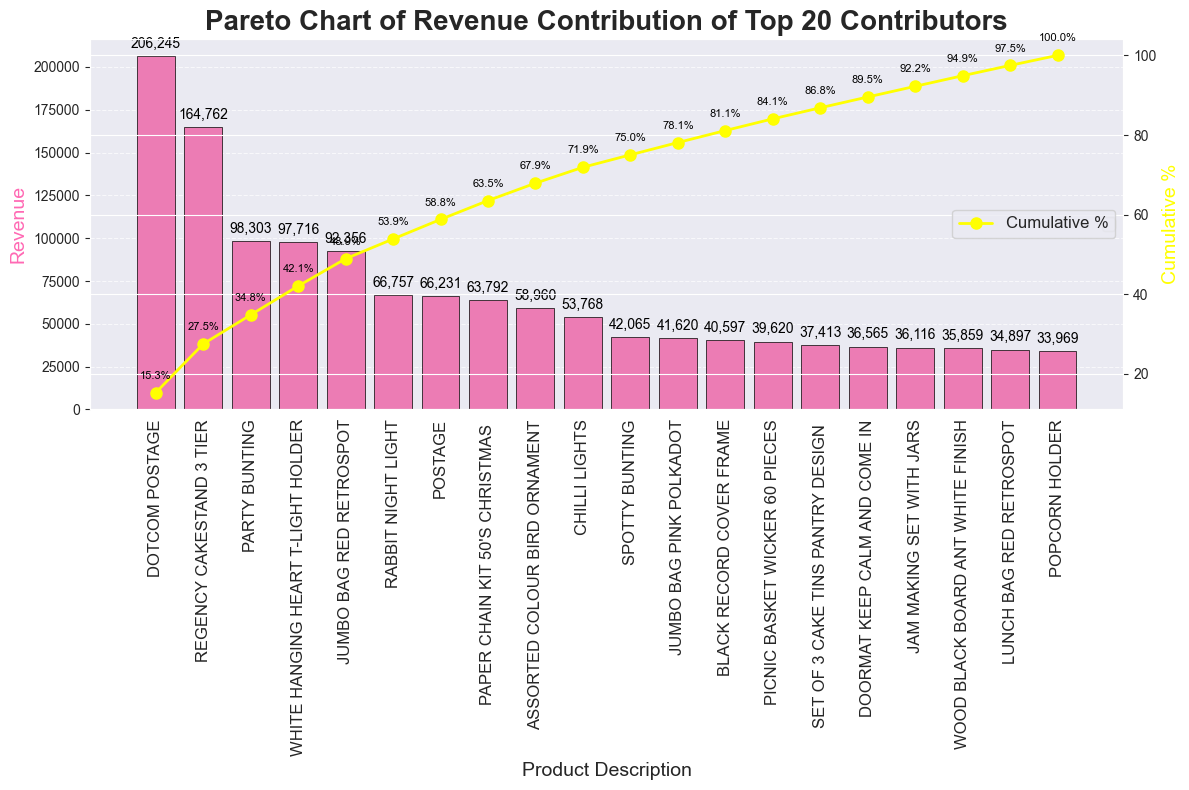

In [22]:

# Create subplots with two axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the revenue as bars on ax1 (using a color gradient for the bars)
sns.barplot(x=top_20_contributors['Description'], y=top_20_contributors['Revenue'], color='hotpink',edgecolor = 'black', linewidth = 0.5)

# Plot the cumulative percentage on ax2 (second y-axis)
ax2 = ax1.twinx()
ax2.plot(top_20_contributors['Description'], top_20_contributors['Cumulative %'], color='yellow', marker='o', linestyle='-', linewidth=2, markersize=8, label='Cumulative %')

# Labeling the cumulative percentage on the plot
for i, txt in enumerate(top_20_contributors['Cumulative %']):
    ax2.annotate(f'{txt:.1f}%', (top_20_contributors['Description'].iloc[i], top_20_contributors['Cumulative %'].iloc[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')

# Annotate the revenue values above the bars
for i, revenue in enumerate(top_20_contributors['Revenue']):
    ax1.text(i, revenue + 5000, f'{revenue:,.0f}', ha='center', fontsize=10, color='black')

# Title and labels with larger font size for readability
ax1.set_title('Pareto Chart of Revenue Contribution of Top 20 Contributors', fontsize=20, fontweight='bold')
ax1.set_xlabel('Product Description', fontsize=14)
ax1.set_ylabel('Revenue', color='hotpink', fontsize=14)
ax2.set_ylabel('Cumulative %', color='yellow', fontsize=14)

# Customize the x-axis labels and rotate them for better readability
ax1.set_xticklabels(top_20_contributors['Description'], rotation=90, fontsize=12)

# Add gridlines for the revenue axis (light lines for clarity)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add legends for both axes
ax1.legend(loc='center right', fontsize=12)
ax2.legend(loc='center right', fontsize=12)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Description'>

Text(0.5, 1.0, 'Revenue Contribution Heatmap of Top 20 Products')

Text(0.5, 36.72222222222221, 'Product')

Text(70.7222222222222, 0.5, 'Revenue')

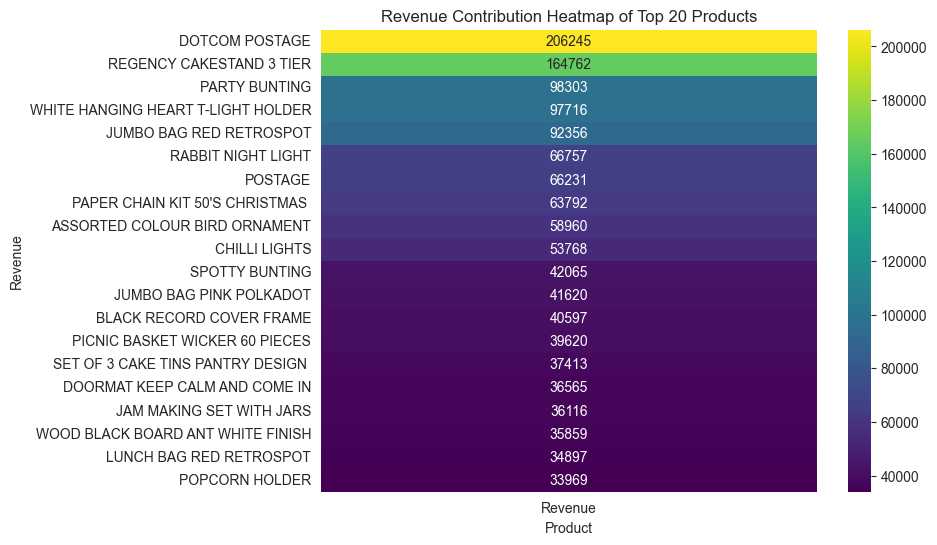

In [23]:
#heatmap 

# Step 1: Create a pivot table if needed (for row/column organization)
# If data is already in a 2D format, this step can be skipped
pareto_pivot = top_20_contributors

# Step 2: Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pareto_pivot.set_index('Description')['Revenue'].to_frame(), annot=True, fmt=".0f", cmap="viridis")
plt.title("Revenue Contribution Heatmap of Top 20 Products")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()




 ## Product Segmentation 
 ### based on sales volume, revenue, and daily sales trends using clustering techniques (K-Means)

In [24]:

# Sales Volume: The total number of items sold for each product.
sales_volume = df.groupby('StockCode')['Quantity'].sum().reset_index()

#The total revenue generated by each product.

df['Revenue'] = df['Quantity'] * df['UnitPrice']
revenue = df.groupby('StockCode')['Revenue'].sum().reset_index()




In [25]:
# Daily Sales Trends: To capture the trend of sales over time, we can create a feature representing the average daily sales of each product:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
daily_sales = df.groupby(['StockCode', df['InvoiceDate'].dt.date])['Quantity'].sum().reset_index()
daily_sales_avg = daily_sales.groupby('StockCode')['Quantity'].mean().reset_index()



In [26]:
# Combine Features
#we'll combine these features (sales volume, revenue, and daily sales trends) into a single DataFrame.

product_data = pd.merge(sales_volume, revenue, on='StockCode', how='inner')
product_data = pd.merge(product_data, daily_sales_avg, on='StockCode', how='inner')
product_data.columns = ['StockCode', 'Sales Volume', 'Revenue', 'Avg Daily Sales']


In [27]:
#Normalize the Data
# To ensure the clustering algorithm treats all features equally, we need to normalize the data. We can use StandardScaler to standardize the features.


scaler = StandardScaler()
scaled_data = scaler.fit_transform(product_data[['Sales Volume', 'Revenue', 'Avg Daily Sales']])



KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 1.0, 'Elbow Method for Optimal Clusters')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Inertia')

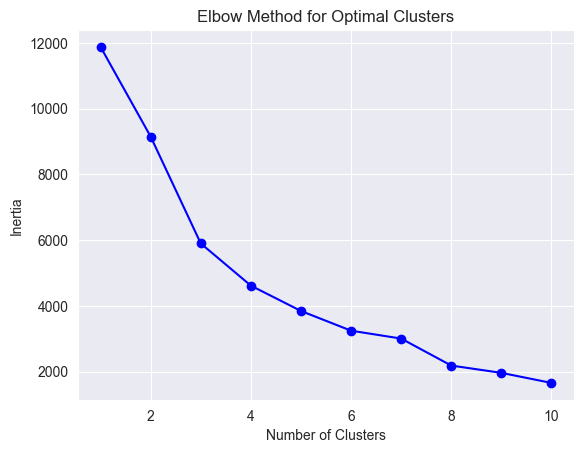

In [28]:
# Apply K-Means Clustering
# We will now apply the K-Means clustering algorithm to segment the products. First, we need to choose the number of clusters. We can use the Elbow Method to determine the optimal number of clusters.

# Elbow Method to determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color = 'blue', label='Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [29]:
# Apply K-Means with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
product_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [30]:
sil_score = silhouette_score(scaled_data, product_data['Cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.8404350595155128


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Product Segmentation using K-Means')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

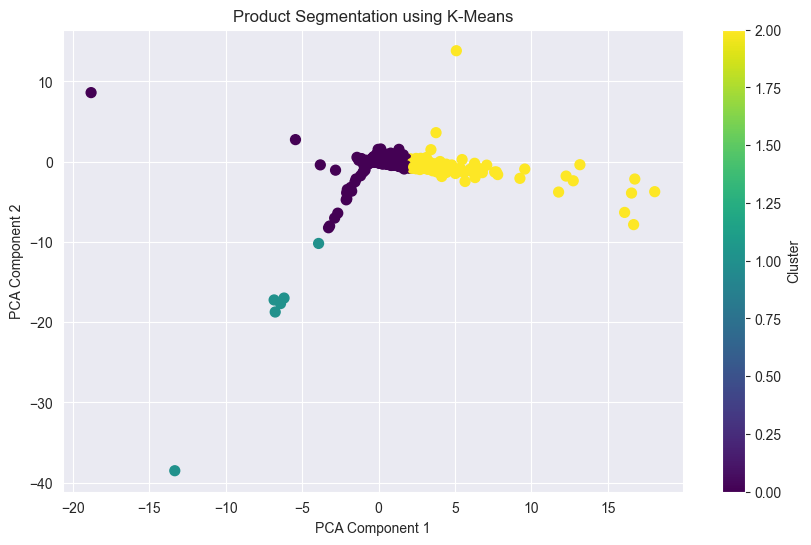

In [31]:
# Visualize the Clusters
# Let's visualize the clusters in a 2D space using PCA (Principal Component Analysis) to reduce the dimensionality.

# Apply PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=product_data['Cluster'], cmap='viridis', s=50)
plt.title('Product Segmentation using K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()



Text(0.5, 0.92, 'Product Segmentation using K-Means')

Text(0.5, 0, 'PCA Component 1')

Text(0.5, 0.5, 'PCA Component 2')

Text(0.5, 0, 'PCA Component 3')

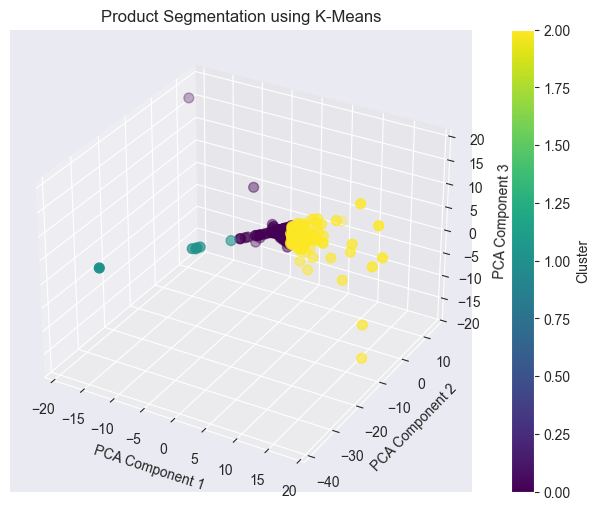

In [32]:
#3D clustering for better understanding
# Apply PCA to reduce data to 3D for visualization
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c=product_data['Cluster'], cmap='viridis', s=50)

# Add title and labels
ax.set_title('Product Segmentation using K-Means')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add colorbar
fig.colorbar(scatter, label='Cluster')

plt.show()


In [33]:
# Analyze the Clusters
# Now that you have the clusters, let’s examine each cluster to see how the products differ in terms of Sales Volume, Revenue, and Avg Daily Sales.

# Group by clusters and compute the mean values for each feature
cluster_summary = product_data.groupby('Cluster').agg({
    'Sales Volume': 'mean',
    'Revenue': 'mean',
    'Avg Daily Sales': 'mean'
}).reset_index()

print(cluster_summary)


   Cluster  Sales Volume       Revenue  Avg Daily Sales
0        0    844.449179   1518.246335         7.890813
1        1  -3183.666667     -9.000000     -2780.500000
2        2  11602.482759  23056.708506        68.348918


# Customer Purchase Patterns

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy import stats
import datetime as dt

In [35]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [36]:
# Remove rows with negative quantities or prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [37]:
#  Create a 'TotalAmount' column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

C:\Users\SURANJANA\AppData\Local\Temp\ipykernel_32916\1015927644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


Top 10 Sales Days:
       InvoiceNo  StockCode                          Description  Quantity  \
540421    581483      23843          PAPER CRAFT , LITTLE BIRDIE     80995   
61619     541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
222680    556444      22502       PICNIC BASKET WICKER 60 PIECES        60   
15017     537632  AMAZONFEE                           AMAZON FEE         1   
299982   A563185          B                      Adjust bad debt         1   
173382    551697       POST                              POSTAGE         1   
348325    567423      23243  SET OF TEA COFFEE SUGAR TINS PANTRY      1412   
52711     540815      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
160546    550461      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
421601    573003      23084                   RABBIT NIGHT LIGHT      2400   

               InvoiceDate  UnitPrice  CustomerID         Country    Revenue  \
540421 2011-12-09 09:15:00       2.08     

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Sales Days')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Total Sales')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2011-12-09 09:15:00'),
  Text(1, 0, '2011-01-18 10:01:00'),
  Text(2, 0, '2011-06-10 15:28:00'),
  Text(3, 0, '2010-12-07 15:08:00'),
  Text(4, 0, '2011-08-12 14:50:00'),
  Text(5, 0, '2011-05-03 13:46:00'),
  Text(6, 0, '2011-09-20 11:05:00'),
  Text(7, 0, '2011-01-11 12:55:00'),
  Text(8, 0, '2011-04-18 13:20:00'),
  Text(9, 0, '2011-10-27 12:11:00')])

Text(0.0, 84234.8, 'Friday\n£168469.60')

Text(1.0, 38591.8, 'Tuesday\n£77183.60')

Text(2.0, 19485.0, 'Friday\n£38970.00')

Text(3.0, 6770.665, 'Tuesday\n£13541.33')

Text(4.0, 5531.03, 'Friday\n£11062.06')

Text(5.0, 4071.375, 'Tuesday\n£8142.75')

Text(6.0, 3572.3599999999997, 'Tuesday\n£7144.72')

Text(7.0, 3269.7000000000003, 'Tuesday\n£6539.40')

Text(8.0, 3269.7000000000003, 'Monday\n£6539.40')

Text(9.0, 2496.0, 'Thursday\n£4992.00')

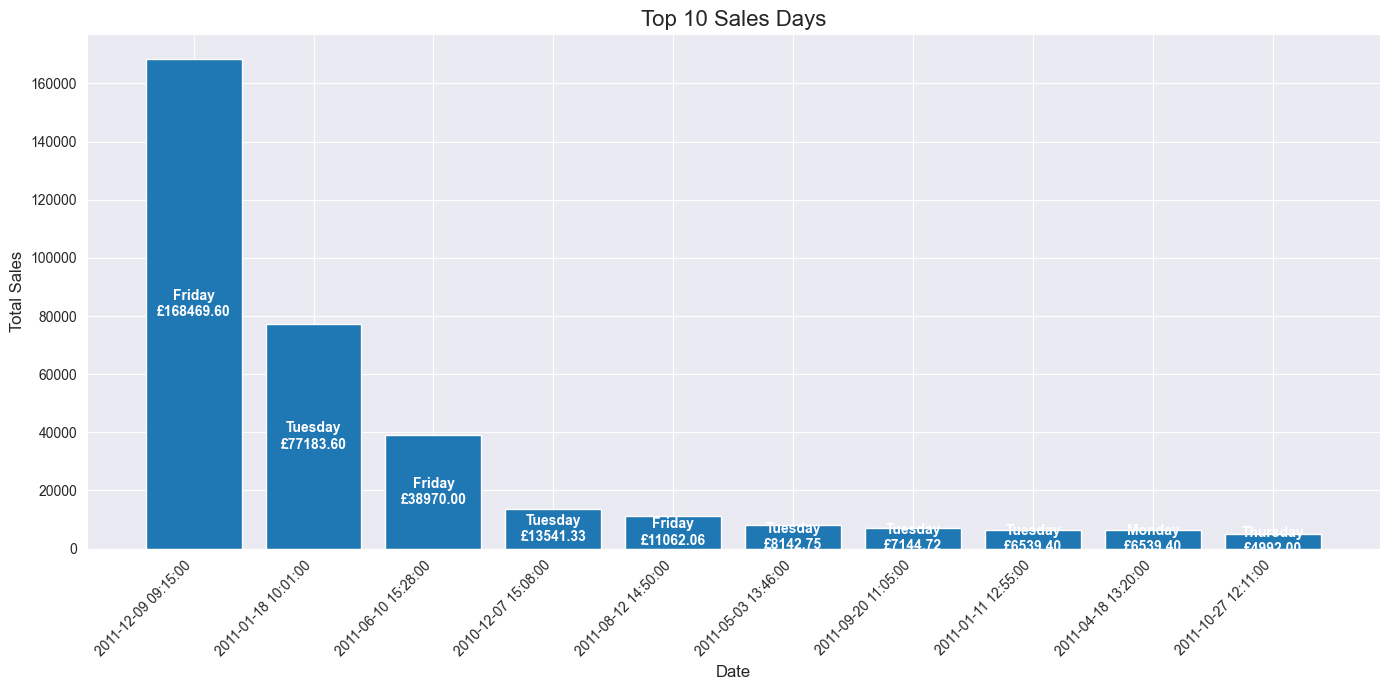

In [38]:
# Top 10 Sales Days
top_10_days = df.nlargest(10, 'TotalAmount')
print("Top 10 Sales Days:")
print(top_10_days)

top_10_days['InvoiceDate'] = pd.to_datetime(top_10_days['InvoiceDate'])

plt.figure(figsize=(14, 7))
bars = plt.bar(top_10_days['InvoiceDate'].astype(str), top_10_days['TotalAmount'])
plt.title('Top 10 Sales Days', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add day of week and sales amount inside bars
for bar, date, sales in zip(bars, top_10_days['InvoiceDate'], top_10_days['TotalAmount']):
    day_of_week = date.day_name()
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, 
             f'{day_of_week}\n£{sales:.2f}', 
             ha='center', va='center', 
             fontweight='bold', color='white')

plt.tight_layout()
plt.show()

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34


In [40]:
# Aggregate data by customer
customer_summary = df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
}).reset_index()

customer_summary.columns = ['CustomerID', 'OrderFrequency', 'TotalSpending']

In [41]:
# Create customer segments
customer_summary['FrequencySegment'] = pd.qcut(customer_summary['OrderFrequency'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
customer_summary['SpendingSegment'] = pd.qcut(customer_summary['TotalSpending'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Customer Purchase Patterns: Order Frequency vs Total Spending')

Text(0.5, 0, 'Order Frequency')

Text(0, 0.5, 'Total Spending')

Text(0.75, 0.95, 'Correlation: 0.96\nAvg Order Frequency: 122.17\nAvg Total Spending: 2458.33')

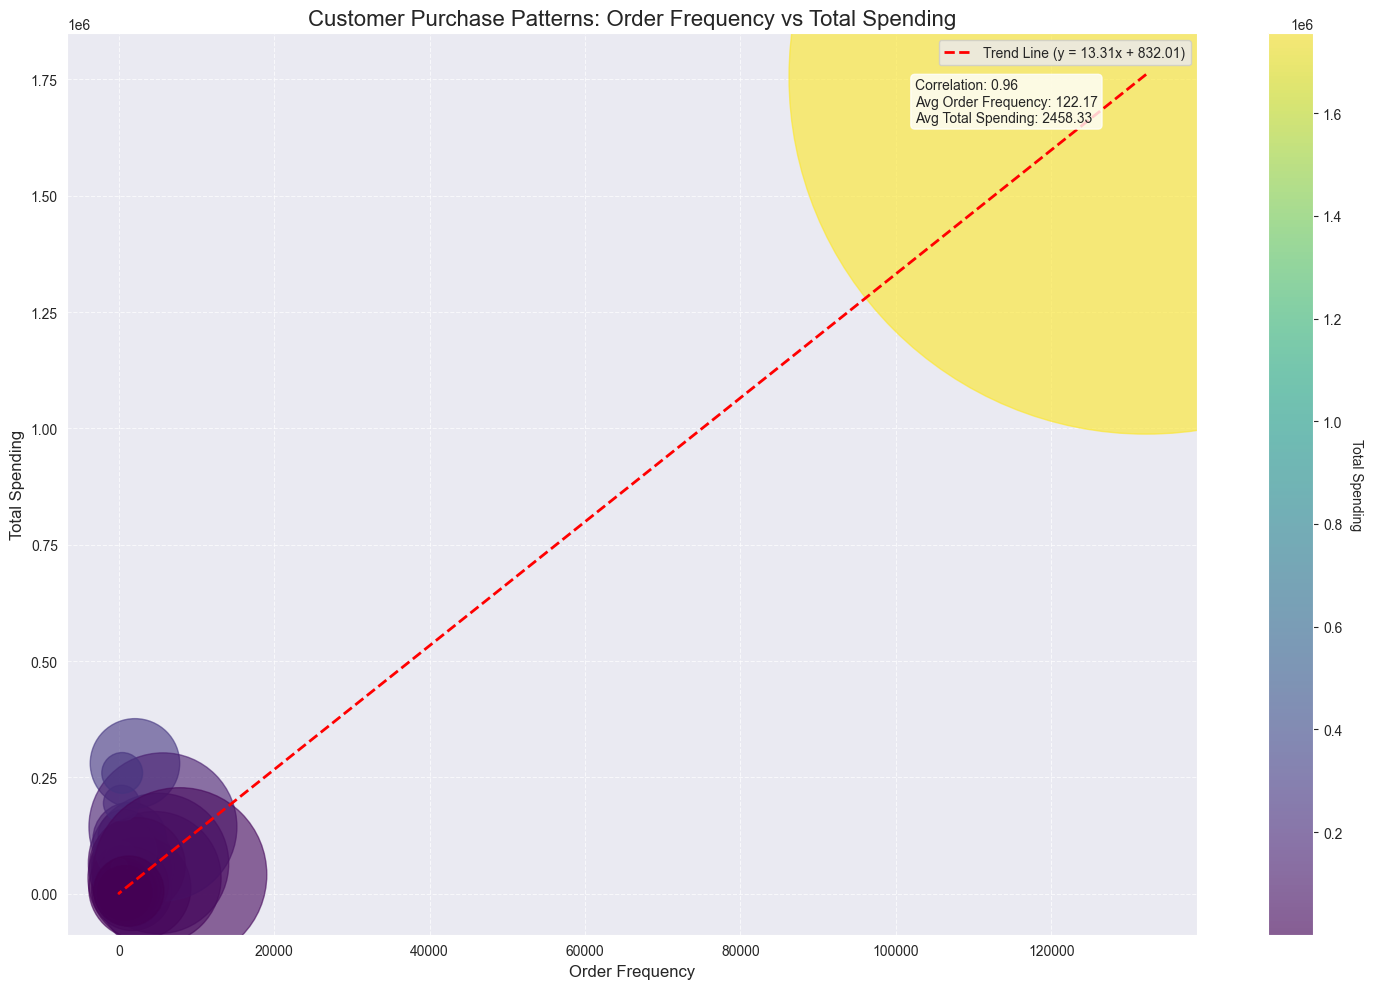

In [42]:
# Create a detailed scatter plot with improved visualization
plt.figure(figsize=(15, 10))

# Scatter plot with size and color representing different aspects
scatter = plt.scatter(
    customer_summary['OrderFrequency'], 
    customer_summary['TotalSpending'],
    c=customer_summary['TotalSpending'],  # Color based on total spending
    s=customer_summary['OrderFrequency'] * 2,  # Size based on order frequency
    alpha=0.6,
    cmap='viridis'
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Total Spending', rotation=270, labelpad=15)

# Add trend line
z = np.polyfit(customer_summary['OrderFrequency'], customer_summary['TotalSpending'], 1)
p = np.poly1d(z)
plt.plot(customer_summary['OrderFrequency'], 
         p(customer_summary['OrderFrequency']), 
         "r--", 
         linewidth=2, 
         label=f'Trend Line (y = {z[0]:.2f}x + {z[1]:.2f})')

# Calculate correlation and other statistics
correlation = customer_summary['OrderFrequency'].corr(customer_summary['TotalSpending'])
avg_frequency = customer_summary['OrderFrequency'].mean()
avg_spending = customer_summary['TotalSpending'].mean()

# Customize the plot
plt.title('Customer Purchase Patterns: Order Frequency vs Total Spending', fontsize=16)
plt.xlabel('Order Frequency', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

# Add text box with statistics
stats_text = f'Correlation: {correlation:.2f}\n'
stats_text += f'Avg Order Frequency: {avg_frequency:.2f}\n'
stats_text += f'Avg Total Spending: {avg_spending:.2f}'
plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='SpendingSegment', ylabel='FrequencySegment'>

Text(0.5, 1.0, 'Average Total Spending by Customer Segment')

Text(0.5, 58.7222222222222, 'Spending Segment')

Text(95.72222222222221, 0.5, 'Frequency Segment')

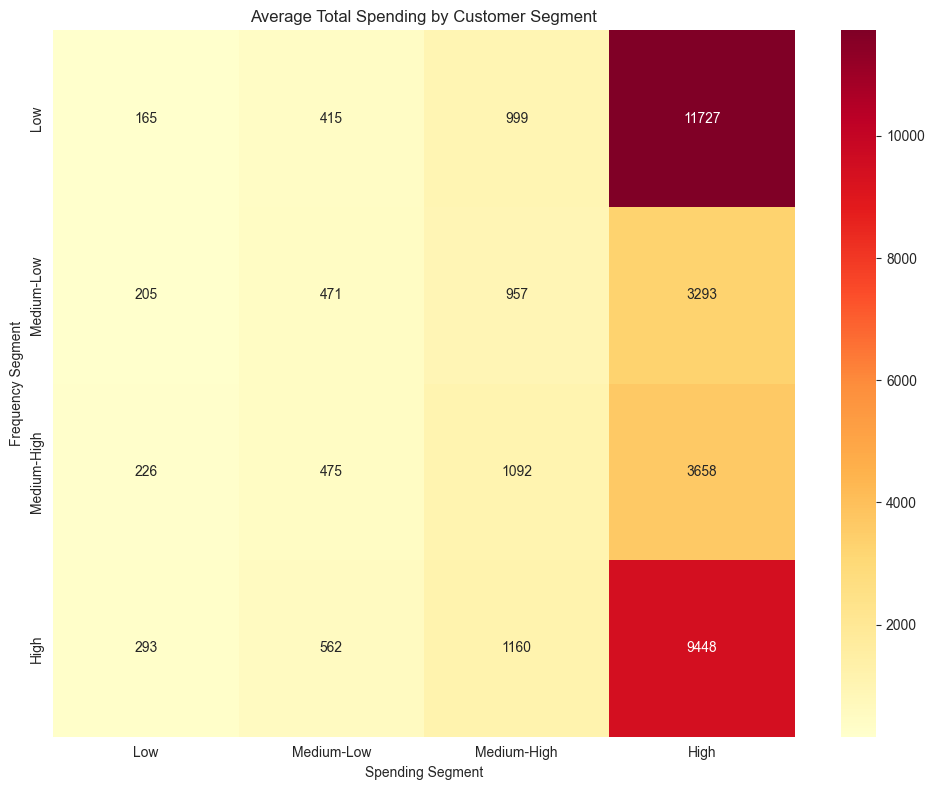

In [43]:
segment_spending = customer_summary.groupby(
    ['FrequencySegment', 'SpendingSegment'], observed=False
)['TotalSpending'].mean().unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(segment_spending, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Total Spending by Customer Segment')
plt.xlabel('Spending Segment')
plt.ylabel('Frequency Segment')
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='SpendingSegment', ylabel='FrequencySegment'>

Text(0.5, 1.0, 'Number of Customers in Each Segment')

Text(0.5, 58.7222222222222, 'Spending Segment')

Text(95.72222222222221, 0.5, 'Frequency Segment')

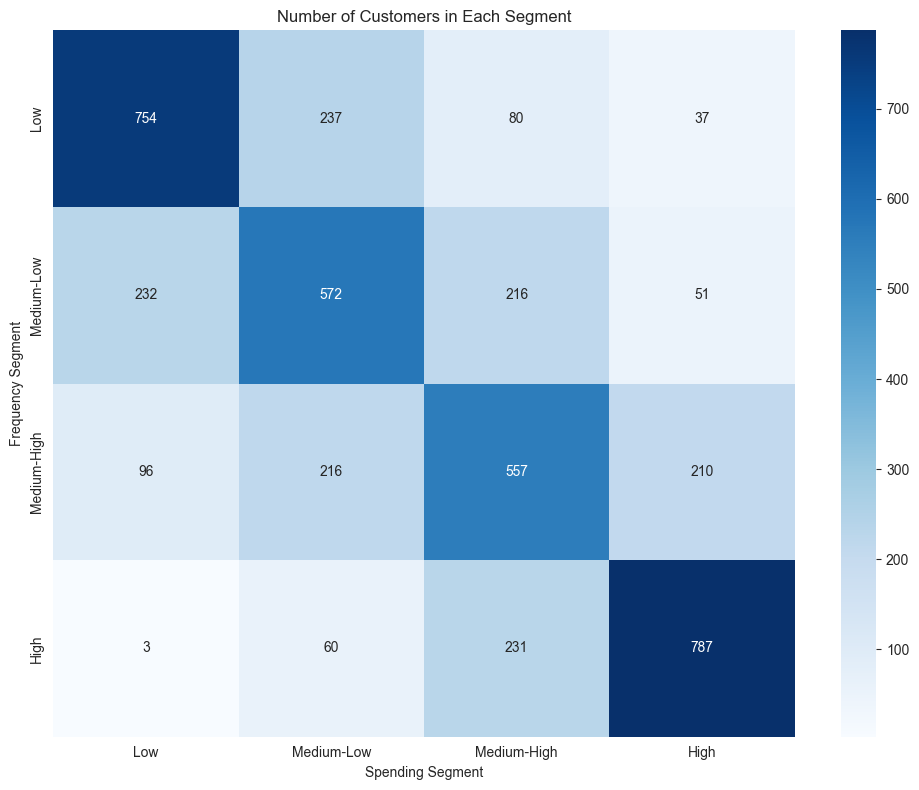

In [44]:
# Segment spending
segment_counts = customer_summary.groupby(['FrequencySegment', 'SpendingSegment'], observed=False).size().unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(segment_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Number of Customers in Each Segment')
plt.xlabel('Spending Segment')
plt.ylabel('Frequency Segment')
plt.tight_layout()
plt.show()



## Daily Sales Trends

In [45]:
# Daily sales data
df['Date'] = df['InvoiceDate'].dt.date
daily_sales = df.groupby('Date')['TotalAmount'].sum().reset_index()

# Convert 'Date' column to datetime
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])
daily_sales['DayOfWeek'] = daily_sales['Date'].dt.day_name()

C:\Users\SURANJANA\AppData\Local\Temp\ipykernel_32916\186048275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['InvoiceDate'].dt.date


<Figure size 1500x600 with 0 Axes>

Text(0.5, 1.0, 'Daily Sales Trend')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Total Sales')

(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(14975.0, 0, '2011-01'),
  Text(15034.0, 0, '2011-03'),
  Text(15095.0, 0, '2011-05'),
  Text(15156.0, 0, '2011-07'),
  Text(15218.0, 0, '2011-09'),
  Text(15279.0, 0, '2011-11')])

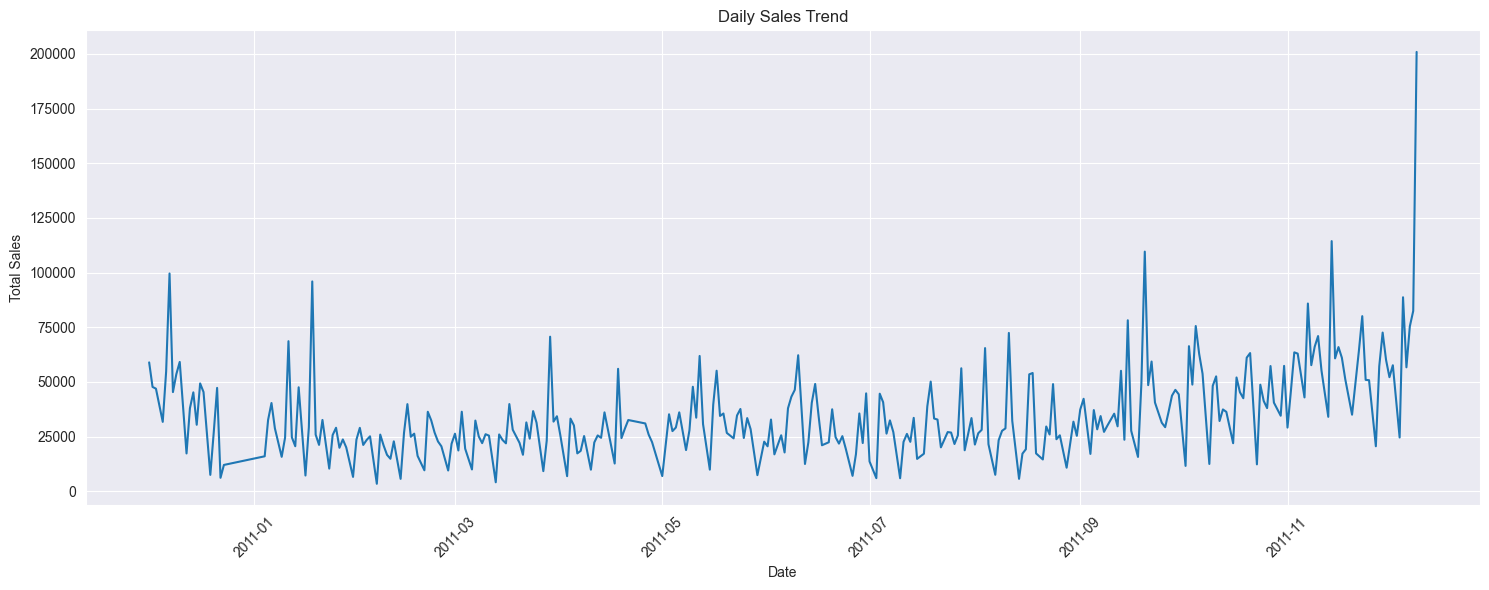

In [46]:
# Daily Sales Trend
plt.figure(figsize=(15, 6))
plt.plot(daily_sales['Date'], daily_sales['TotalAmount'])
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='DayOfWeek'>

Text(0.5, 1.0, 'Average Sales by Day of the Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Average Total Sales')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

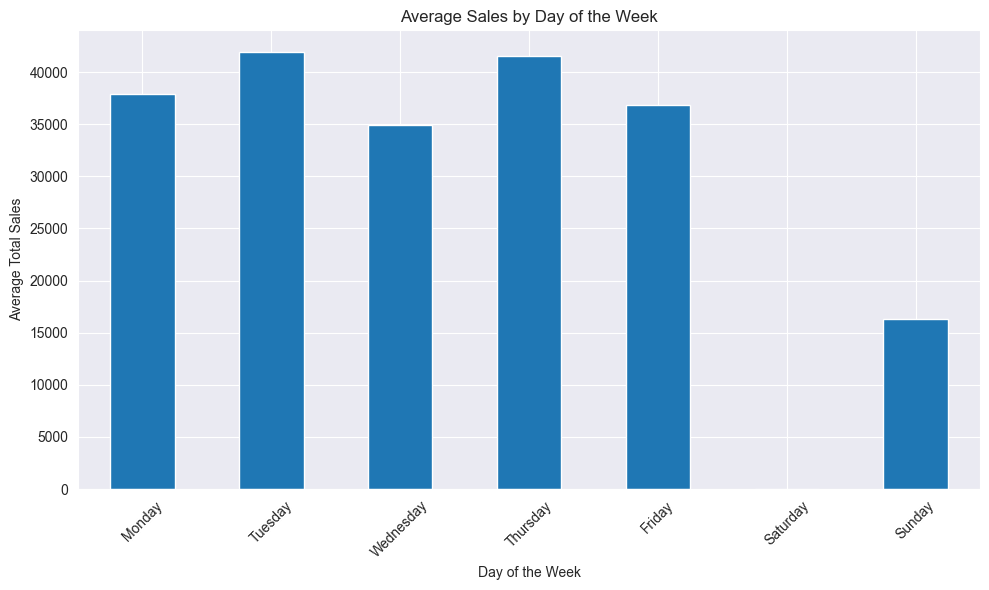

In [47]:
# Sales by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = daily_sales.groupby('DayOfWeek')['TotalAmount'].mean().reindex(day_order)

plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Sales Days:
          Date  TotalAmount  DayOfWeek
304 2011-12-09    200920.60     Friday
282 2011-11-14    114419.89     Monday
235 2011-09-20    109612.03    Tuesday
5   2010-12-07     99618.20    Tuesday
32  2011-01-18     95978.05    Tuesday
300 2011-12-05     88741.96     Monday
276 2011-11-07     85881.81     Monday
303 2011-12-08     82495.00   Thursday
290 2011-11-23     80104.18  Wednesday
231 2011-09-15     78218.95   Thursday


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Sales Days')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Total Sales')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2011-12-09'),
  Text(1, 0, '2011-11-14'),
  Text(2, 0, '2011-09-20'),
  Text(3, 0, '2010-12-07'),
  Text(4, 0, '2011-01-18'),
  Text(5, 0, '2011-12-05'),
  Text(6, 0, '2011-11-07'),
  Text(7, 0, '2011-12-08'),
  Text(8, 0, '2011-11-23'),
  Text(9, 0, '2011-09-15')])

Text(0.0, 100460.3, 'Friday\n£200920.60')

Text(1.0, 57209.945, 'Monday\n£114419.89')

Text(2.0, 54806.015, 'Tuesday\n£109612.03')

Text(3.0, 49809.1, 'Tuesday\n£99618.20')

Text(4.0, 47989.025, 'Tuesday\n£95978.05')

Text(5.0, 44370.98, 'Monday\n£88741.96')

Text(6.0, 42940.905, 'Monday\n£85881.81')

Text(7.0, 41247.5, 'Thursday\n£82495.00')

Text(8.0, 40052.09, 'Wednesday\n£80104.18')

Text(9.0, 39109.475, 'Thursday\n£78218.95')

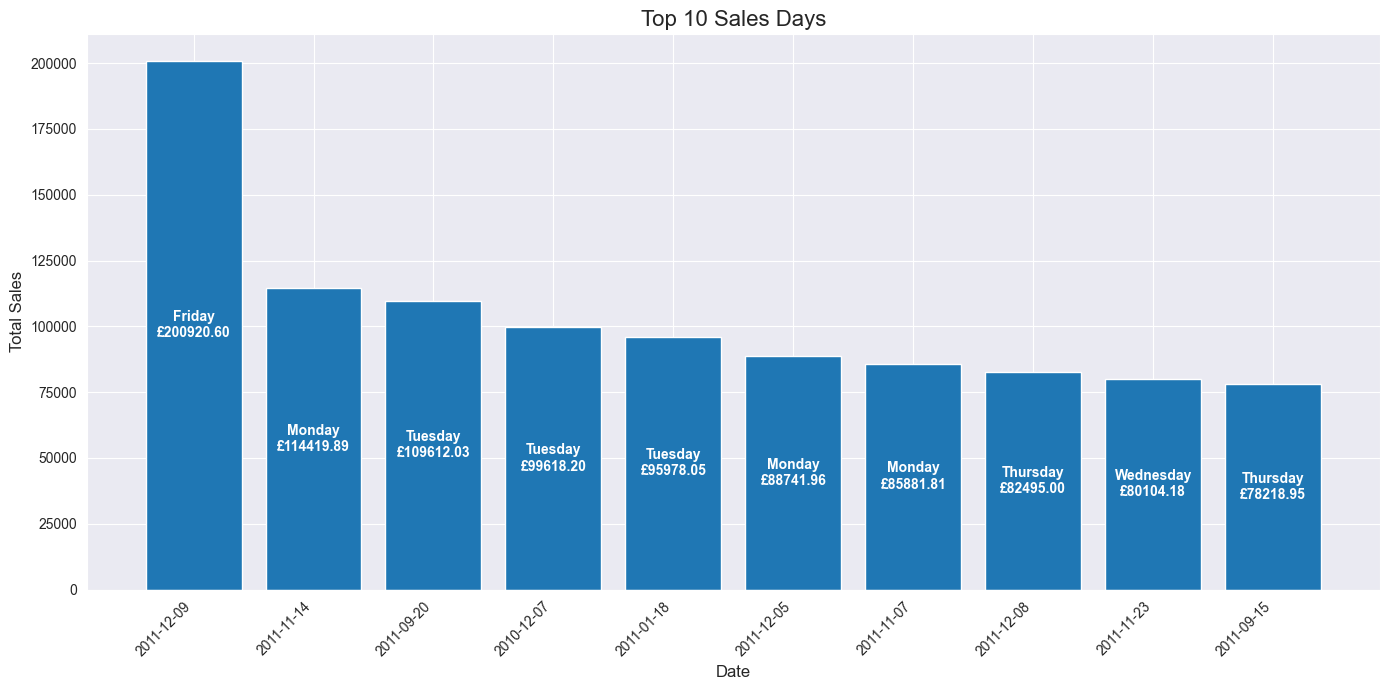

In [48]:
# Top 10 Sales Days
top_10_days = daily_sales.nlargest(10, 'TotalAmount')
print("Top 10 Sales Days:")
print(top_10_days)

top_10_days['Date'] = pd.to_datetime(top_10_days['Date'])

plt.figure(figsize=(14, 7))
bars = plt.bar(top_10_days['Date'].astype(str), top_10_days['TotalAmount'])
plt.title('Top 10 Sales Days', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add day of week and sales amount inside bars
for bar, date, sales in zip(bars, top_10_days['Date'], top_10_days['TotalAmount']):
    day_of_week = date.day_name()
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, 
             f'{day_of_week}\n£{sales:.2f}', 
             ha='center', va='center', 
             fontweight='bold', color='white')

plt.tight_layout()
plt.show()

C:\Users\SURANJANA\AppData\Local\Temp\ipykernel_32916\2774157479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Monthly Sales Trend')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Total Sales')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2010-12'),
  Text(1, 0, '2011-01'),
  Text(2, 0, '2011-02'),
  Text(3, 0, '2011-03'),
  Text(4, 0, '2011-04'),
  Text(5, 0, '2011-05'),
  Text(6, 0, '2011-06'),
  Text(7, 0, '2011-07'),
  Text(8, 0, '2011-08'),
  Text(9, 0, '2011-09'),
  Text(10, 0, '2011-10'),
  Text(11, 0, '2011-11'),
  Text(12, 0, '2011-12')])

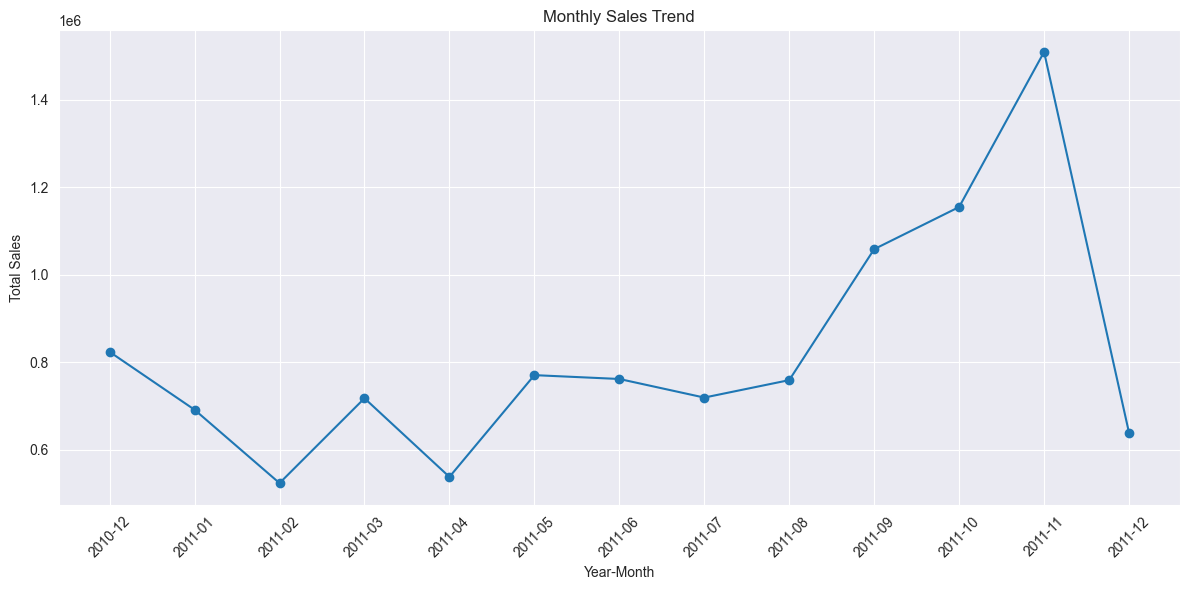

In [49]:
# Monthly Sales Trend
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['TotalAmount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalAmount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='TotalAmount', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Daily Sales')

Text(0.5, 0, 'Total Daily Sales')

Text(0, 0.5, 'Frequency')

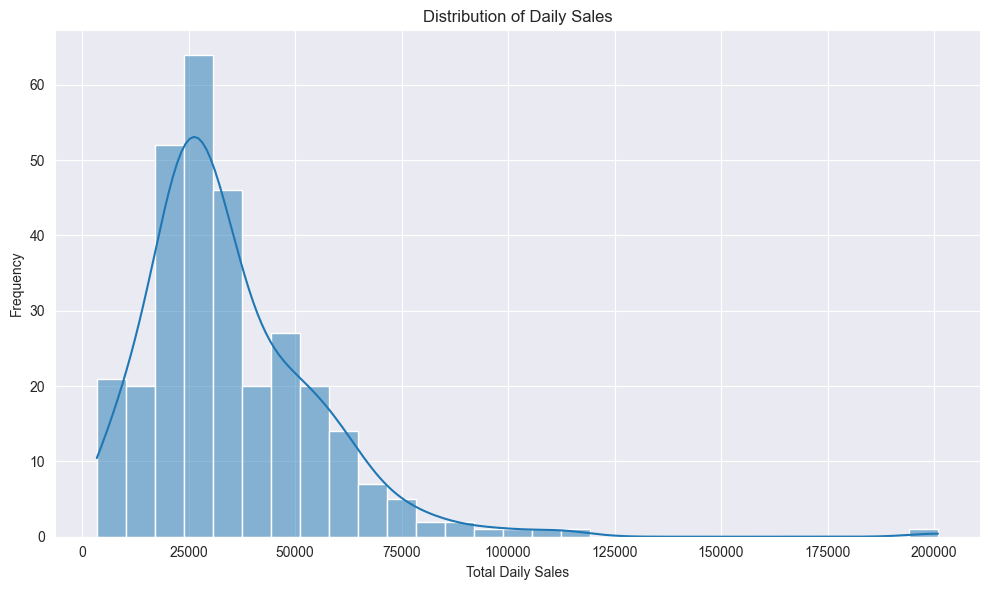

In [50]:
# Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(daily_sales['TotalAmount'], kde=True)
plt.title('Distribution of Daily Sales')
plt.xlabel('Total Daily Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

Text(0.5, 1.0, 'Daily Sales Performance: Identifying Consistent Performers')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Total Sales (£)')

(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(14975.0, 0, '2011-01'),
  Text(15034.0, 0, '2011-03'),
  Text(15095.0, 0, '2011-05'),
  Text(15156.0, 0, '2011-07'),
  Text(15218.0, 0, '2011-09'),
  Text(15279.0, 0, '2011-11')])

Text(0.15, 0.98, 'Total Days: 305\nConsistent Days: 45\nConsistency Rate: 14.75%')

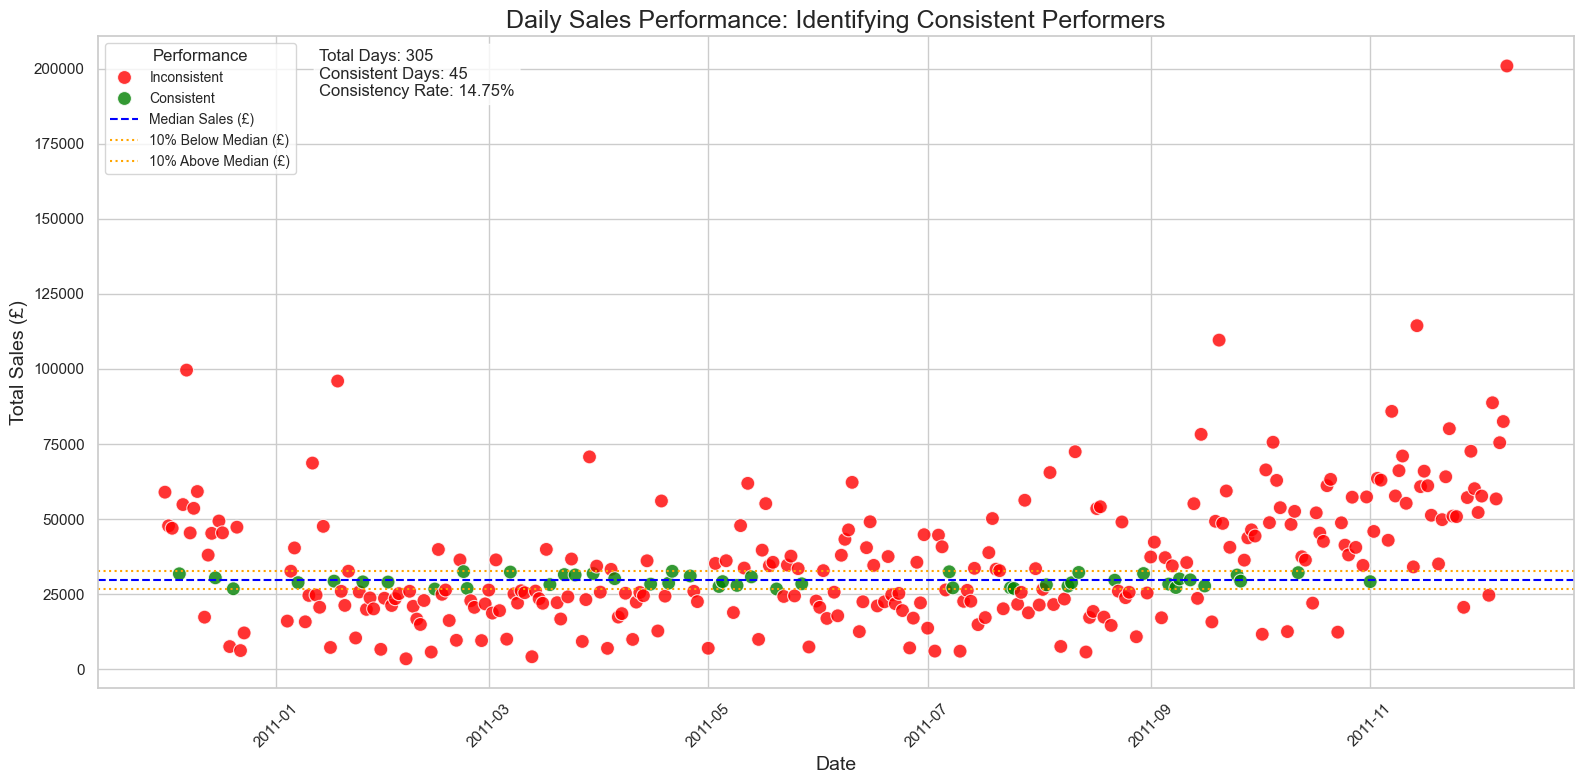


Consistent Performers Analysis:
Median Daily Sales: £29651.46
Lower Bound (90% of median): £26686.31
Upper Bound (110% of median): £32616.61
Number of Consistent Days: 45
Percentage of Consistent Days: 14.75%


In [51]:
# Consistent Performers

# Calculate median and consistent performers
median_sales = daily_sales['TotalAmount'].median()
lower_bound = median_sales * 0.9
upper_bound = median_sales * 1.1

# Create a new column to categorize days
daily_sales['Performance'] = np.where(
    (daily_sales['TotalAmount'] >= lower_bound) & (daily_sales['TotalAmount'] <= upper_bound),
    'Consistent',
    'Inconsistent'
)

# Create the scatter plot
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")  # Set the style for the plot

# Scatter plot with improved aesthetics
scatter = sns.scatterplot(data=daily_sales, x='Date', y='TotalAmount', hue='Performance', 
                          palette={'Consistent': 'green', 'Inconsistent': 'red'}, 
                          alpha=0.8, s=100, edgecolor='w')

# Add lines for median and bounds with annotations
plt.axhline(y=median_sales, color='blue', linestyle='--', label='Median Sales (£)')
plt.axhline(y=lower_bound, color='orange', linestyle=':', label='10% Below Median (£)')
plt.axhline(y=upper_bound, color='orange', linestyle=':', label='10% Above Median (£)')

# Customize the plot
plt.title('Daily Sales Performance: Identifying Consistent Performers', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales (£)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Performance', title_fontsize='12', fontsize='10')
plt.grid(True)

# Add text box with statistics
consistent_count = (daily_sales['Performance'] == 'Consistent').sum()
total_days = len(daily_sales)
consistent_percentage = (consistent_count / total_days) * 100

stats_text = f'Total Days: {total_days}\n'
stats_text += f'Consistent Days: {consistent_count}\n'
stats_text += f'Consistency Rate: {consistent_percentage:.2f}%'

plt.text(0.15, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print additional insights
print("\nConsistent Performers Analysis:")
print(f"Median Daily Sales: £{median_sales:.2f}")
print(f"Lower Bound (90% of median): £{lower_bound:.2f}")
print(f"Upper Bound (110% of median): £{upper_bound:.2f}")
print(f"Number of Consistent Days: {consistent_count}")
print(f"Percentage of Consistent Days: {consistent_percentage:.2f}%")

## Order Behavior Analysis

In [52]:
# group data by 'StockCode' and count unique 'InvoiceNo' to determine total orders per product
# each unique 'InvoiceNo' represents one order
ordersPerProduct = df.groupby('StockCode')['InvoiceNo'].nunique()

# sort the grouped data in descending order to identify high-demand products
ordersPerProduct = ordersPerProduct.sort_values(ascending=False)

# reset the index to convert the grouped data into a regular dataframe
ordersPerProduct = ordersPerProduct.reset_index()

# rename columns to make them more descriptive
ordersPerProduct.columns = ['stockCode', 'orderCount']

In [53]:
# create a dataframe of unique product descriptions to provide context for the analysis
# remove duplicates to ensure one description per product
uniqueDescriptions = df[['StockCode', 'Description']].drop_duplicates()

# merge the product descriptions with the grouped data based on 'StockCode'
ordersPerProduct = pd.merge(
    ordersPerProduct,
    uniqueDescriptions,
    how='left',
    left_on='stockCode',
    right_on='StockCode'
)

# drop the redundant 'StockCode' column after merging (already renamed to 'stockCode')
ordersPerProduct.drop(columns=['StockCode'], inplace=True)

# display the top 10 high-demand products for review
print('Top 10 high-demand products:')
print(ordersPerProduct.head(10))

Top 10 high-demand products:
  stockCode  orderCount                         Description
0    85123A        2198  WHITE HANGING HEART T-LIGHT HOLDER
1    85123A        2198  CREAM HANGING HEART T-LIGHT HOLDER
2    85099B        2089             JUMBO BAG RED RETROSPOT
3     22423        1988            REGENCY CAKESTAND 3 TIER
4     47566        1685                       PARTY BUNTING
5     20725        1565             LUNCH BAG RED RETROSPOT
6     20725        1565                LUNCH BAG RED SPOTTY
7     84879        1455       ASSORTED COLOUR BIRD ORNAMENT
8     22197        1392                SMALL POPCORN HOLDER
9     22197        1392                      POPCORN HOLDER


C:\Users\SURANJANA\AppData\Local\Temp\ipykernel_32916\4258757183.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topProducts['description'] = topProducts['Description'].astype(str)


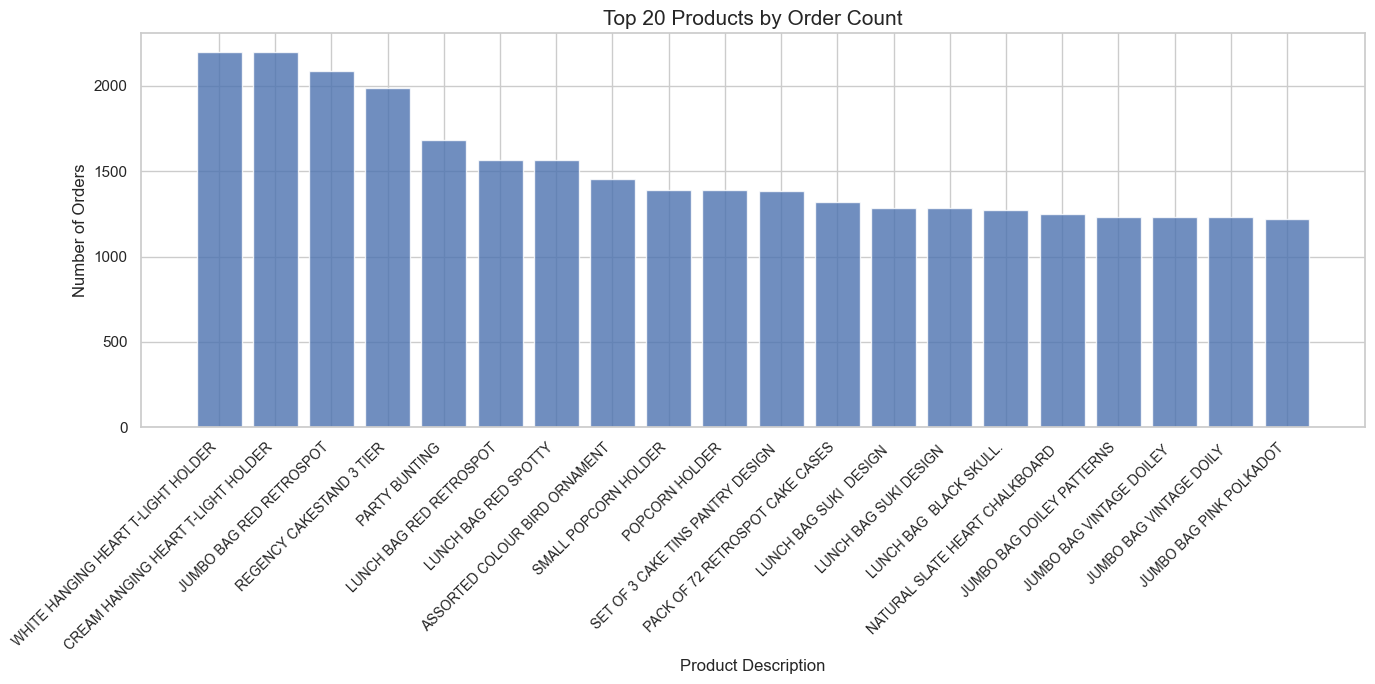

In [54]:
import matplotlib.pyplot as plt

# visualize order behavior with a bar chart
# select the top 20 products based on order count for visualization
topProducts = ordersPerProduct.head(20)

# ensure the 'description' column is of string type for proper plotting
topProducts['description'] = topProducts['Description'].astype(str)

# plot a bar chart with product descriptions on the x-axis
plt.figure(figsize=(14, 7))  # set figure size for better readability
plt.bar(topProducts['description'], topProducts['orderCount'], alpha=0.8)

# add labels and title to the chart
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Top 20 Products by Order Count', fontsize=15)

# customize x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # rotate and align labels

# adjust layout to prevent overlap of labels
plt.tight_layout()

# display the chart
plt.show();



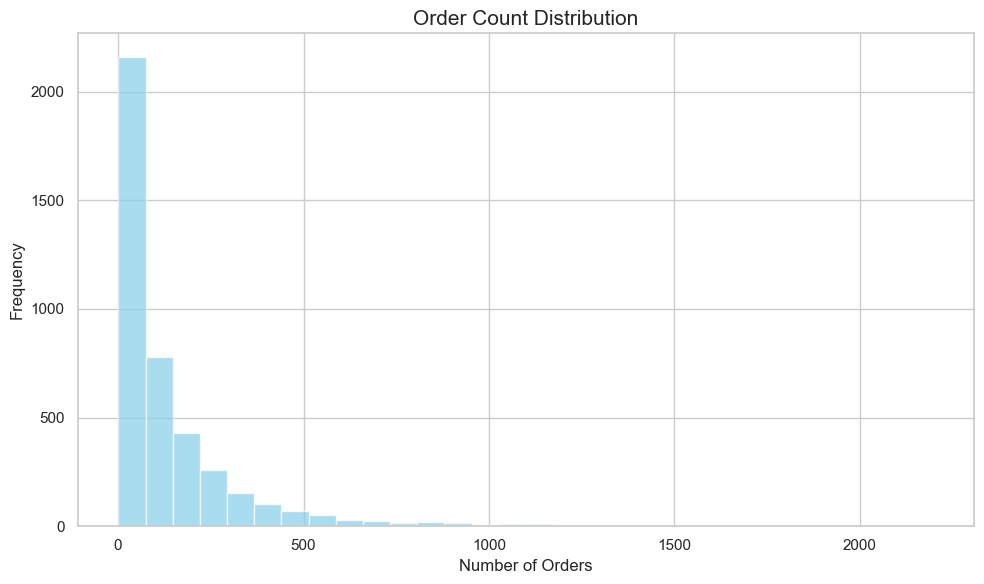

In [55]:
# visualize order distribution with a histogram
plt.figure(figsize=(10, 6))
plt.hist(ordersPerProduct['orderCount'], bins=30, color='skyblue', alpha=0.7)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Order Count Distribution', fontsize=15)
plt.tight_layout()
plt.show();

In [56]:
# analyze frequency distribution
# calculate basic statistics
meanOrders = ordersPerProduct['orderCount'].mean()
medianOrders = ordersPerProduct['orderCount'].median()
modeOrders = ordersPerProduct['orderCount'].mode()[0]
maxOrders = ordersPerProduct['orderCount'].max()

print('Order count statistics:')
print(f' - Mean orders per product: {meanOrders:.2f}')
print(f' - Median orders per product: {medianOrders}')
print(f' - Mode orders per product: {modeOrders}')
print(f' - Maximum orders for a single product: {maxOrders}')

Order count statistics:
 - Mean orders per product: 137.63
 - Median orders per product: 69.0
 - Mode orders per product: 1
 - Maximum orders for a single product: 2198


## Customer Segmentation Clustering

In [57]:
# import necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# preprocess dataset to calculate RFM metrics and other customer-level features
customerData = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # recency
    'InvoiceNo': 'nunique',  # frequency (number of orders)
    'UnitPrice': lambda x: np.sum(x * df.loc[x.index, 'Quantity']),  # monetary value
    'StockCode': 'nunique',  # number of unique products purchased
    'Quantity': lambda x: np.mean(x * df.loc[x.index, 'UnitPrice'])  # avg order value
}).reset_index()

# check the generated columns to ensure correctness
print(customerData.columns)  # debug step to confirm column names

# rename columns properly based on the generated output
customerData.columns = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'UniqueProducts', 'AvgOrderValue']

# display the first few rows to verify the dataframe structure
customerData.head()

Index(['CustomerID', 'InvoiceDate', 'InvoiceNo', 'UnitPrice', 'StockCode',
       'Quantity'],
      dtype='object')


,CustomerID,Recency,Frequency,MonetaryValue,UniqueProducts,AvgOrderValue
0,0.0,0,1428,1755276.64,3408,13.275425
1,12346.0,325,1,77183.60,1,77183.600000
2,12347.0,1,7,4310.00,103,23.681319
3,12348.0,74,4,1797.24,22,57.975484
4,12349.0,18,1,1757.55,73,24.076027


In [58]:
# standardize features
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(customerData[['Recency', 'Frequency', 'MonetaryValue', 'UniqueProducts', 'AvgOrderValue']])

# apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customerData['Cluster'] = kmeans.fit_predict(scaledFeatures)

In [59]:
# inspect for extreme outliers in scaled features
z_scores = np.abs(scaledFeatures)
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers: {outliers.sum()}')

# optionally remove outliers
cleanedFeatures = scaledFeatures[~outliers]
cleanedCustomerData = customerData[~outliers]

Number of outliers: 47


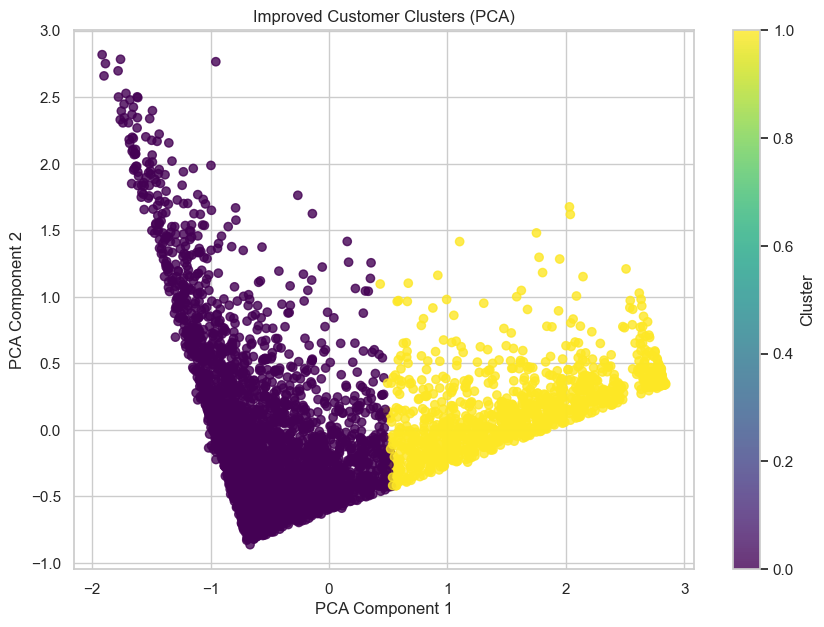

In [60]:
from sklearn.decomposition import PCA

# fit PCA on cleaned features
pca = PCA(n_components=2)
pcaComponents = pca.fit_transform(cleanedFeatures)

# visualize
plt.figure(figsize=(10, 7))
plt.scatter(pcaComponents[:, 0], pcaComponents[:, 1], c=cleanedCustomerData['Cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Improved Customer Clusters (PCA)')
plt.colorbar(label='Cluster')
plt.show();

## Dashboard

In [61]:
import openpyxl
import dash
import pandas as pd
import plotly.express as px


In [62]:
import pandas as pd

# Load data from Excel file
file_path = 'Online Retail.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='Online Retail')

# Data Preparation
# Drop rows with missing values in critical columns
sales_data.dropna(subset=['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID'], inplace=True)

# Convert InvoiceDate to datetime format
sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'])

# Calculate TotalAmount
sales_data['TotalAmount'] = sales_data['Quantity'] * sales_data['UnitPrice']

# Optional: Remove negative quantities if they exist (returns)
sales_data = sales_data[sales_data['Quantity'] > 0]

# Display the first few rows of the dataset to verify preparation
print(sales_data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  


In [63]:
# Install necessary libraries
!pip install dash pandas plotly dash-bootstrap-components -q

# Import libraries
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.graph_objects as go

# Load dataset
file_path = 'Online Retail.xlsx'
data = pd.read_excel(file_path)

# Add calculated columns
data['Revenue'] = data['Quantity'] * data['UnitPrice']
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Date'] = data['InvoiceDate'].dt.date
data['Month'] = data['InvoiceDate'].dt.to_period('M')

# Dash App
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.CYBORG])

app.layout = dbc.Container([
    # Header
    dbc.Row([
        dbc.Col(html.H1("Sales Dashboard", className="text-center text-white mb-4"), width=12)
    ]),

    # Filters
    dbc.Row([
        dbc.Col([
            html.Label("Select Country:", className="text-white"),
            dcc.Dropdown(
                id='country-filter',
                options=[{'label': 'All', 'value': 'All'}] + 
                        [{'label': country, 'value': country} for country in data['Country'].unique()],
                value='All',  # Default to "All"
                placeholder="All Countries",
                style={'color': 'black'}
            )
        ], width=4),

        dbc.Col([
            html.Label("Select Date Range:", className="text-white"),
            dcc.DatePickerRange(
                id='date-filter',
                start_date=data['Date'].min(),
                end_date=data['Date'].max(),
                display_format="YYYY-MM-DD",
                style={'color': 'black'}
            )
        ], width=4),
    ], className="mb-4"),

    # KPI Cards
    dbc.Row([
        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H4("Total Revenue", className="text-center text-primary"),
                html.H2(id="total-revenue", className="text-center text-white")
            ])
        ], color="dark", outline=True), width=4),

        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H4("Total Orders", className="text-center text-primary"),
                html.H2(id="total-orders", className="text-center text-white")
            ])
        ], color="dark", outline=True), width=4),

        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H4("Unique Customers", className="text-center text-primary"),
                html.H2(id="total-customers", className="text-center text-white")
            ])
        ], color="dark", outline=True), width=4),
    ], className="mb-4"),

    # Pyramid Plot
    dbc.Row([
        dbc.Col(dcc.Graph(id="product-performance-chart"), width=12)
    ], className="mb-4"),

    # Daily Sales Trends and Customer Segmentation (Side by Side)
    dbc.Row([
        dbc.Col(dcc.Graph(id="daily-sales-trends-chart"), width=6),
        dbc.Col(dcc.Graph(id="customer-segmentation-chart"), width=6),
    ], className="mb-4"),

    # Quantity Movement Chart (Standalone)
    dbc.Row([
        dbc.Col(dcc.Graph(id="quantity-movement-chart"), width=12)
    ], className="mb-4"),

    # Pareto Chart
    dbc.Row([
        dbc.Col(dcc.Graph(id="pareto-chart"), width=12)
    ], className="mb-4"),
])

# Callbacks
@app.callback(
    [
        Output("total-revenue", "children"),
        Output("total-orders", "children"),
        Output("total-customers", "children"),
        Output("daily-sales-trends-chart", "figure"),
        Output("customer-segmentation-chart", "figure"),
        Output("quantity-movement-chart", "figure"),
        Output("product-performance-chart", "figure"),  # Pyramid plot
        Output("pareto-chart", "figure")  # Pareto Chart
    ],
    [Input("country-filter", "value"), Input("date-filter", "start_date"), Input("date-filter", "end_date")]
)
def update_dashboard(selected_country, start_date, end_date):
    # Filter and preprocess the data
    if not start_date:
        start_date = data['InvoiceDate'].min()
    if not end_date:
        end_date = data['InvoiceDate'].max()

    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    filtered_data = data[
        (data['InvoiceDate'] >= start_date) &
        (data['InvoiceDate'] <= end_date)
    ]
    
    if selected_country and selected_country != 'All':
        filtered_data = filtered_data[filtered_data['Country'] == selected_country]
    
    # Handle empty dataset
    if filtered_data.empty:
        empty_fig = go.Figure().update_layout(title="No Data Available")
        return "$0", "0", "0", empty_fig, empty_fig, empty_fig, empty_fig, empty_fig

    # KPIs
    total_revenue = f"${filtered_data['Revenue'].sum():,.0f}"
    total_orders = f"{filtered_data['InvoiceNo'].nunique()}"
    total_customers = f"{filtered_data['CustomerID'].nunique()}"

    # Daily Sales Trends
    daily_sales_data = filtered_data.groupby('Date')['Revenue'].sum().reset_index()
    daily_sales_fig = px.line(
        daily_sales_data, 
        x='Date', 
        y='Revenue', 
        title="Daily Sales Trends"
    )
    daily_sales_fig.update_layout(
        paper_bgcolor='rgba(0,0,0,0)', 
        plot_bgcolor='rgba(0,0,0,0)', 
        title_font_color='white',
        xaxis=dict(title="Date", color='white'),
        yaxis=dict(title="Revenue", color='white')
    )

    # Customer Segmentation
    customer_data = filtered_data.groupby('CustomerID').agg({'InvoiceNo': 'count', 'Revenue': 'sum'}).reset_index()
    customer_fig = px.scatter(
        customer_data, 
        x='InvoiceNo', 
        y='Revenue', 
        hover_data=['CustomerID'], 
        title="Customer Segmentation"
    )
    customer_fig.update_layout(
        paper_bgcolor='rgba(0,0,0,0)', 
        plot_bgcolor='rgba(0,0,0,0)', 
        title_font_color='white',
        xaxis=dict(title="Number of Orders", color='white'),
        yaxis=dict(title="Revenue", color='white')
    )

    # Quantity Movement Chart
    filtered_data['Month'] = filtered_data['InvoiceDate'].dt.strftime('%B')  # Extract month name
    quantity_data = filtered_data.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

    # Sort months chronologically
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    quantity_data['Month'] = pd.Categorical(quantity_data['Month'], categories=month_order, ordered=True)
    quantity_data = quantity_data.sort_values('Month')

    # Top 5 Products by Total Quantity
    top_products = (
        quantity_data.groupby('Description')['Quantity'].sum()
        .nlargest(5).index
    )
    quantity_data = quantity_data[quantity_data['Description'].isin(top_products)]

    quantity_fig = px.line(
        quantity_data, 
        x='Month', 
        y='Quantity', 
        color='Description', 
        title="Quantity Movement by Month for Top 5 Products"
    )
    quantity_fig.update_layout(
        paper_bgcolor='rgba(0,0,0,0)', 
        plot_bgcolor='rgba(0,0,0,0)', 
        title_font_color='white', 
        xaxis=dict(title="Month", color='white'),
        yaxis=dict(title="Quantity Sold", color='white'),
        legend=dict(font=dict(color="white"))
    )

    # Pyramid Plot for Top 10 Products by Revenue and Order Frequency
    top_revenue_products = (
        filtered_data.groupby('Description')['Revenue'].sum()
        .sort_values(ascending=False)
        .head(10)
    )

    top_order_products = (
        filtered_data.groupby('Description')['InvoiceNo'].nunique()
        .sort_values(ascending=False)
        .head(10)
    )

    # Normalize Order Frequency to Revenue Range
    max_revenue = top_revenue_products.max()
    max_orders = top_order_products.max()
    normalized_orders = top_order_products * (max_revenue / max_orders)

    # Create Pyramid Plot
    pyramid_fig = go.Figure()

    # Revenue Bar (Right Side)
    pyramid_fig.add_trace(go.Bar(
        x=top_revenue_products.values,
        y=top_revenue_products.index,
        orientation='h',
        name='Revenue',
        marker=dict(color='blue'),
        hovertemplate='%{y}: $%{x:,.2f}<extra></extra>'
    ))

    # Normalized Order Frequency Bar (Left Side)
    pyramid_fig.add_trace(go.Bar(
        x=-normalized_orders.values,
        y=normalized_orders.index,
        orientation='h',
        name='Order Frequency',
        customdata=top_order_products.values,
        hovertemplate='%{y}: %{customdata}<extra></extra>'
    ))

    # Update Layout for Pyramid
    pyramid_fig.update_layout(
        title="Top 10 Products by Revenue and Order Frequency",
        xaxis=dict(
            title="Values",
            tickvals=[-max_revenue, -max_revenue / 2, 0, max_revenue / 2, max_revenue],
            ticktext=[
                f"{int(max_orders):,} Orders",
                f"{int(max_orders / 2):,} Orders",
                "0",
                f"${int(max_revenue / 2):,}",
                f"${int(max_revenue):,}"
            ],
            color='white'
        ),
        yaxis=dict(title="Products", color='white'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        title_font_color='white',
        font=dict(color='white'),
        barmode='relative'
    )

    # Pareto Chart for Top 20 Contributors by Revenue
    top_20_contributors = (
        filtered_data.groupby('Description')['Revenue']
        .sum()
        .sort_values(ascending=False)
        .head(20)
        .reset_index()
    )
    top_20_contributors['Cumulative %'] = (
        top_20_contributors['Revenue'].cumsum() / top_20_contributors['Revenue'].sum() * 100
    )

    # Truncate long product descriptions for X-axis
    top_20_contributors['Short Description'] = top_20_contributors['Description'].str.slice(0, 15) + "..."

    pareto_fig = go.Figure()

    # Add Revenue Bars
    pareto_fig.add_trace(go.Bar(
        x=top_20_contributors['Short Description'],
        y=top_20_contributors['Revenue'],
        name='Revenue',
        marker=dict(color='hotpink'),
        hovertemplate='%{x}<br>Full Name: %{customdata}<br>Revenue: $%{y:,.2f}<extra></extra>',
        customdata=top_20_contributors['Description']  # Full product descriptions for hover
    ))

    # Add Cumulative Percentage Line
    pareto_fig.add_trace(go.Scatter(
        x=top_20_contributors['Short Description'],
        y=top_20_contributors['Cumulative %'],
        name='Cumulative %',
        mode='lines+markers',
        marker=dict(color='yellow', size=6), 
        line=dict(color='yellow', width=2, dash='solid'),
        hovertemplate='%{x}: %{y:.1f}%<extra></extra>',
        yaxis='y2'  # Specify the secondary Y-axis
    ))

    # Annotate Cumulative Percentage (Every 5th Point)
    for i, txt in enumerate(top_20_contributors['Cumulative %']):
        if i % 5 == 0:  # Add annotations only for every 5th point
            pareto_fig.add_annotation(
                x=top_20_contributors['Short Description'][i],
                y=txt + 5,  
                text=f'{txt:.1f}%',
                showarrow=False,
                font=dict(size=12, color='white'),  # Larger font size and contrasting color
                align='center',
                yref='y2'  # Use secondary Y-axis for annotations
            )

    # Update Layout for Pareto Chart
    pareto_fig.update_layout(
        title="Pareto Chart: Revenue Contribution of Top 20 Products",
        xaxis=dict(
            title="Product Description",
            color='white',
            tickangle=-45,  # Rotate X-axis labels vertically
            tickfont=dict(size=10) 
        ),
        yaxis=dict(
            title="Revenue",
            color='hotpink',
            showgrid=True
        ),
        yaxis2=dict(
            title="Cumulative %",
            titlefont=dict(color='yellow'),
            overlaying='y',
            side='right',
            tickfont=dict(color='yellow'),
            range=[0, 100],  # Ensure the secondary Y-axis is scaled between 0 and 100%
            showgrid=False
        ),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        title_font_color='white',
        font=dict(color='white'),
        legend=dict(
            font=dict(color='white'),
            orientation='h',  # Horizontal legend
            x=0.5,  # Center the legend horizontally
            xanchor='center',
            y=-0.4  # Move legend below the chart
        ),
        margin=dict(
            b=200,  # Add space at the bottom for long X-axis labels
            t=50,   # Reduce top margin
            r=50    # Add space for Y-axis2 labels
        )
    )
    return total_revenue, total_orders, total_customers, daily_sales_fig, customer_fig, quantity_fig, pyramid_fig, pareto_fig


# Run the app
if __name__ == '__main__':
    app.run_server(port=8052, debug=True)
    



True

#### Using web browser to run the code 

In [ ]:
   import webbrowser
webbrowser.open('http://127.0.0.1:8052/')

### That above code will automatically opean the dasboard in the system's default web browser.